# Practical 1: Introduction to probabilistic methods and Monte Carlo simulations
_2024-2025 - Tribel Pascal_

In this first practical work, you will become familiar with the fundamental concepts of probabilistic methods and Monte Carlo simulations, using Python and its standard libraries for mathematical and graphical manipulation.

## Necessary libraries

To run this practical work, the following libraries must be installed:
- `NumPy`: Vector and matrix manipulation, random number generation,
- `SciPy`: For advanced numerical statistical methods,
- `Matplotlib`: For data visualization,
- `tqdm`: For beautiful loading bars.

If you are using Jupyter Notebook, you can install the dependencies directly by running the cell below:

In [ ]:
!pip install numpy matplotlib tqdm

If the libraries are already installed, you can skip this step.

## 1. Introduction to `NumPy`
`NumPy` is an essential library for scientific computations in Python. It offers:
- `ndarray` objects to represent multi-dimensional arrays.
- A collection of mathematical functions to perform fast operations on these arrays.

### Manipulation of `NumPy` arrays
Here are some examples for creating and manipulating `NumPy` arrays:

In [ ]:
import numpy as np

## Example of creation of arrays

In [ ]:
v0 = np.array([1, 2, 3])
v1 = np.arange(0, 3, 0.2)
v2 = np.linspace(0, 5, 10)
v3 = np.linspace(0, 2, 10)
M = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print(v0)
print(v1)
print(v2)
print(v3)
print(M)

[1 2 3]
[0.  0.2 0.4 0.6 0.8 1.  1.2 1.4 1.6 1.8 2.  2.2 2.4 2.6 2.8]
[0.         0.55555556 1.11111111 1.66666667 2.22222222 2.77777778
 3.33333333 3.88888889 4.44444444 5.        ]
[0.         0.22222222 0.44444444 0.66666667 0.88888889 1.11111111
 1.33333333 1.55555556 1.77777778 2.        ]
[[1 2 3]
 [4 5 6]
 [7 8 9]]


## Basic operations

In [ ]:
s = np.sum(v0)
m = np.mean(M)
p = np.dot(v2, v3)
print("Sum of v0 components:", s)
print("Average value in M:", m)
print("Scalar product of v2 and v3:", p)

Sum of v0 components: 6
Average value in M: 5.0
Scalar product of v2 and v3: 35.18518518518518


We encourage you to consult the official `NumPy` documentation to explore its many features: _https://numpy.org/doc/stable/_.
A larger introduction to `NumPy` and `MatPlotLib` is available in the $5^{\text{th}}$ practical of the course INFO-F305 - Modélisation et Simulation.

## 2. Introduction to the `numpy.random` module
The `NumPy` library includes a `numpy.random` submodule dedicated to random number generation. This module offers:
- Random number generators for various distributions (uniform, normal, binomial, etc.).
- Tools for drawing samples and manipulating random sequences.

### Reproducibility of results
To ensure the reproducibility of simulations, it is crucial to set a random seed.

Example:

In [ ]:
np.random.seed(42)
values = np.random.rand(5)
print(values)

[0.37454012 0.95071431 0.73199394 0.59865848 0.15601864]


### Available distributions
Here are some common distributions:
- `numpy.random.uniform(low, high, size)` : Uniform distribution.
- `numpy.random.normal(loc, scale, size)` : Normal (Gaussian) distribution.
- `numpy.random.binomial(n, p, size)` : Binomial distribution.

### Sampling
Sampling is the process of randomly selecting elements from a population. For example:

In [ ]:
population = np.array([1, 2, 3, 4, 5])
sample = np.random.choice(population, size=(3, 3), replace=True)
print(sample)

[[3 3 3]
 [5 4 3]
 [5 2 4]]


# 3. Monte Carlo Simulation
Monte Carlo simulations are a class of numerical techniques based on the random generation of samples to solve mathematical or physical problems. They are particularly useful for:
- Estimating complex integrals.
- Solving problems in statistical physics.
- Analyzing complex probabilistic systems.

### Example 1: Approximation of $\pi$
Monte Carlo methods can be used to estimate the value of $\pi$ by simulating random points inside a square and checking how many fall inside an inscribed circle. The ratio of the area of the circle to the square is directly proportional to $\pi$, allowing us to estimate its value. The steps are as follows:

1. Generate random points uniformly distributed within a unit square.
2. Calculate the distance of each point from the origin.
3. Determine whether the points fall inside the unit circle ($d \leq 1$).
4. Compute the ratio of points inside the circle to the total number of points and multiply by $4$ to estimate $\pi$.

This method becomes more accurate as the number of random points increases.

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
n_points = 10000
points = np.random.rand(n_points, 2)
distances = np.sqrt(points[:, 0]**2 + points[:, 1]**2)
inside_circle = distances <= 1

pi_estimation = 4 * np.sum(inside_circle) / n_points

#### Visualisation

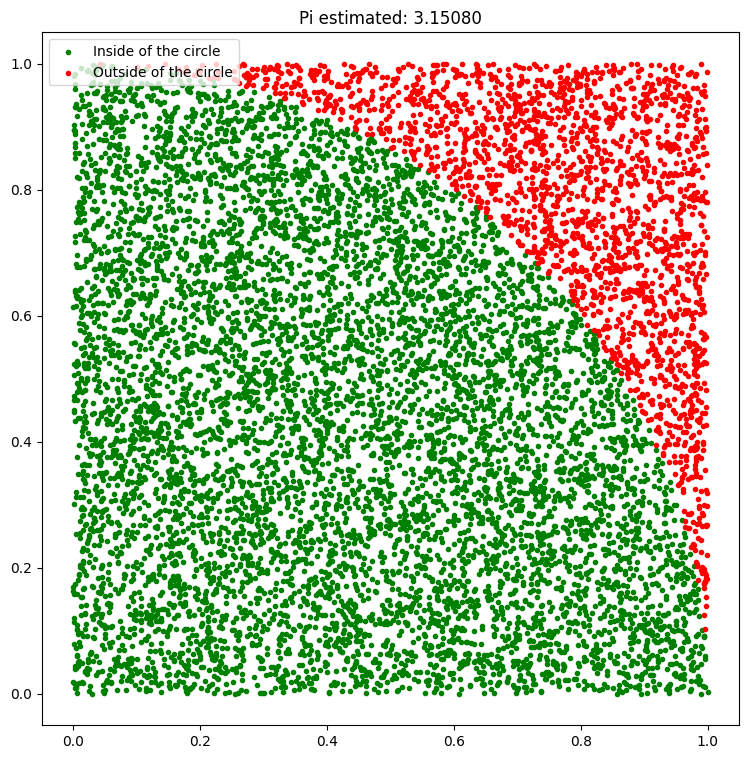

In [ ]:
plt.figure(figsize=(9, 9))
plt.scatter(points[inside_circle, 0], points[inside_circle, 1], color='green', marker='.', label='Inside of the circle')
plt.scatter(points[~inside_circle, 0], points[~inside_circle, 1], color='red', marker='.', label='Outside of the circle')
plt.title(f'Pi estimated: {pi_estimation:.5f}')
plt.legend()
plt.show()

Other examples might include estimating integral values or optimizing stochastic functions. We will explore two more examples in this section.

# 4. Exercises
1. Reproduce the estimation of $\pi$ with different numbers of points and plot the evolution of the estimation according to the number of sampled points. How does the seed affect the estimation ?
2. Implement a Monte Carlo simulation to estimate the integral of the function $f(x) = x^2$ over the interval $[0, 1]$.
3. Use a normal distribution to model a random variable, with parameters $\mu = 0$ and $\sigma = \frac12$ and calculate the probability that it takes a value in the interval $[-0.25, 0.25]$.

In [ ]:
from tqdm.auto import tqdm

### Exercise 1: $\pi$ estimation

In [ ]:
max_n_points = 10000
approximations = []
distances = []
for n_points in tqdm(range(max_n_points)):
    point = np.random.rand(2)
    distances.append(np.sqrt(point[0]**2 + point[1]**2))
    inside_circle = np.array(distances) <= 1
    approximations.append(4 * np.sum(inside_circle) / (n_points+1))

  0%|          | 0/10000 [00:00<?, ?it/s]

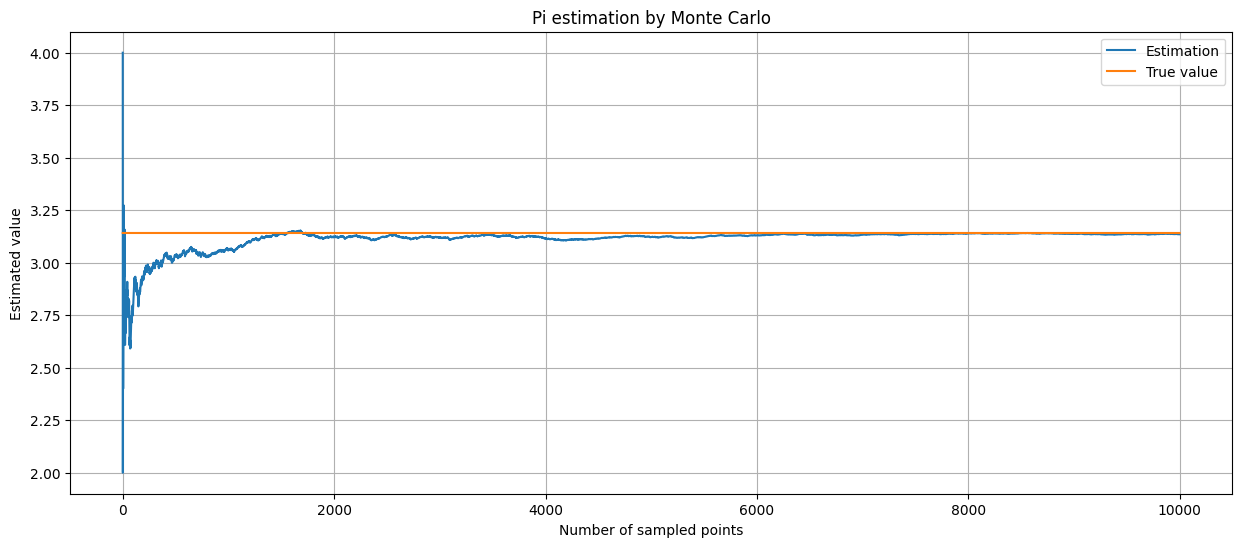

In [ ]:
plt.figure(figsize=(15, 6))
plt.plot(approximations, label="Estimation")
plt.plot([np.pi for _ in range(max_n_points)], label="True value")
plt.xlabel("Number of sampled points")
plt.ylabel("Estimated value")
plt.title("Pi estimation by Monte Carlo")
plt.grid()
plt.legend()
plt.show()

### Exercise 2: Integral estimation
The indefinite integral is given by
$$\int x^2 \,dx = \frac{x^3}{3}$$
and therefore the definite interval is
$$\int_{0}^{1} x^2 \,dx = \frac{1^3}{3} - \frac{0^3}{3} = \frac13$$

In [ ]:
n_points = 10000
approximations = []
points = np.random.rand(n_points, 2)
under_curve = np.array(points[:, 1]) <= np.array(points[:, 0])**2
estimation = np.sum(under_curve) / n_points
print(estimation)

0.3313


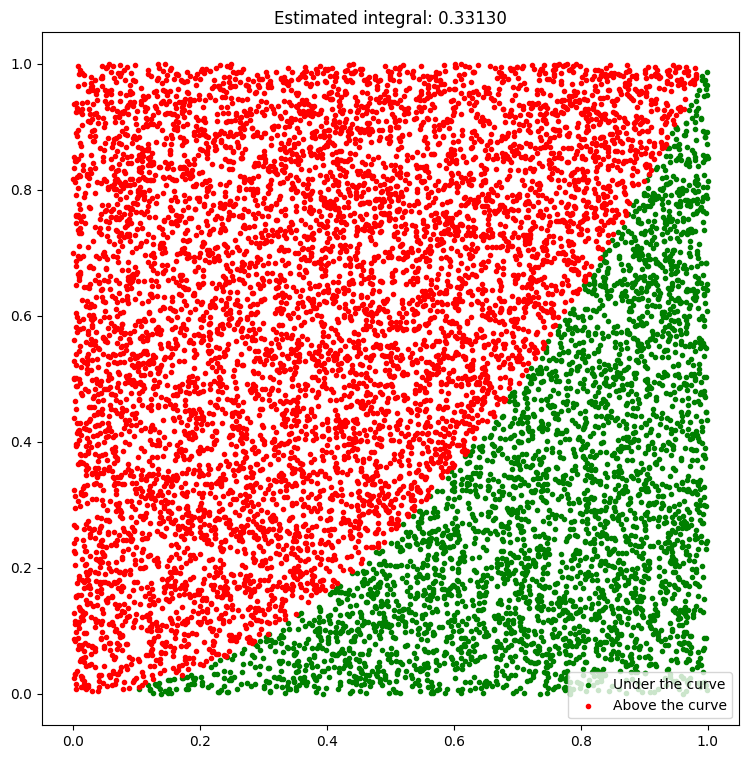

In [ ]:
plt.figure(figsize=(9, 9))
plt.scatter(points[under_curve, 0], points[under_curve, 1], color='green', marker='.', label='Under the curve')
plt.scatter(points[~under_curve, 0], points[~under_curve, 1], color='red', marker='.', label='Above the curve')
plt.title(f'Estimated integral: {estimation:.5f}')
plt.legend()
plt.show()

### Exercice 3
Let us first show how to analytically compute the requested probablity.
The probability that $X$ lies within the interval is given by:
$$P(-0.25 \leq X \leq 0.25) = \int_{-0.25}^{0.25} f_X(x) \, dx$$
where the Probability Density Function $f_X(x)$ is:
$$f_X(x) = \frac{1}{\sqrt{2 \pi \sigma^2}} e^{-\frac{(x - \mu)^2}{2 \sigma^2}}$$
In our case, $\mu = 0$ and $\sigma^2 = 1/2$, so:
$$f_X(x) = \frac{1}{\sqrt{\pi}} e^{-2x^2}$$
To simplify the calculation, we convert $X$ to the standard normal variable $Z$:
$$Z = \frac{X - \mu}{\sigma}, \quad \text{where } \sigma = \sqrt{1/2} = \frac{\sqrt{2}}{2}$$
For the bounds of the interval:
$$z_{-0.25} = \frac{-0.25 - 0}{\sigma} = -0.25 \cdot \frac{2}{\sqrt{2}} = -\frac{\sqrt{2}}{4}, \quad
z_{0.25} = \frac{0.25 - 0}{\sigma} = \frac{\sqrt{2}}{4}$$
The probability is then expressed using the repartition function $\Phi(z)$ of the standard normal distribution:
$$P(-0.25 \leq X \leq 0.25) = P\left(-\frac{\sqrt{2}}{4} \leq Z \leq \frac{\sqrt{2}}{4}\right) = \Phi\left(\frac{\sqrt{2}}{4}\right) - \Phi\left(-\frac{\sqrt{2}}{4}\right)$$
Using the symmetry of the standard normal distribution:
$$\Phi(-z) = 1 - \Phi(z)$$
This simplifies to:
$$P(-0.25 \leq X \leq 0.25) = 2 \cdot \Phi\left(\frac{\sqrt{2}}{4}\right) - 1$$
To find $\Phi\left(\frac{\sqrt{2}}{4}\right)$, we can use values in tables. It yields:
$$\frac{\sqrt{2}}{4} \approx 0.3536$$
From standard normal tables or software (we can use `SciPy`):

In [ ]:
import scipy

In [ ]:
scipy.stats.norm.cdf((2**0.5)/4)

0.6381631950841185

$$\Phi(0.3536) \approx 0.6388$$

Thus:
$$P(-0.25 \leq X \leq 0.25)$$ is given by

In [ ]:
2*scipy.stats.norm.cdf((2**0.5)/4)-1

0.2763263901682369

The Monte Carlo simulation yields a pretty close value:

In [ ]:
n_points = 10000
approximations = []
points = np.random.normal(0, 0.5**0.5, size=(n_points,))
in_interval = (np.abs(np.array(points)) <= 0.25)
estimation = np.sum(in_interval) / n_points
print(estimation)

0.2786


### Exercice 4: Monte Carlo approximation of parameters

Use Monte Carlo simulation to approximate numerically the mean of a Normal r.v. ${\mathbf z} \sim N(\mu,\sigma^2)$ and of the variable ${\mathbf y}= {\mathbf z}^2$. Verify that MC returns a good approximation of the analytical result.
Hint $\mbox{Var}[{\mathbf z}]=E[{\mathbf z}^2]-E[{\mathbf z}]^2$

In [2]:
import numpy as np
from scipy import stats

# Monte Carlo estimation of parameters

R = 100000  # number of MC trials

Ez = 0.5 ## mu
Vz = 1.7 ## sigma^2
z = np.random.normal(Ez, np.sqrt(Vz), R)
y = z**2

print(f"E[z]={Ez}; MC est E[z] ={np.mean(z)}")
# MonteCarlo estimation of E[z]

print(f"Var[z]={Vz}; MC est Var[z] ={np.var(z)}")
# MonteCarlo estimation of Var[z]

print(f"E[z^2]={Vz+Ez**2}; MC est E[y=z^2] ={np.mean(y)}")
##Var[z]=E[z^2]-E[z]^2 -> E[z^2]=Var[z]+E[z]^2=Vz+Ez^2





E[z]=0.5; MC est E[z] =0.5003755307757621
Var[z]=1.7; MC est Var[z] =1.6960142735647228
E[z^2]=1.95; MC est E[y=z^2] =1.946389945363848


Use MC to approximate numerically $E[ {\mathbf k}]$ and $\mbox{Var}[ {\mathbf k}]$ where ${\mathbf k} = | {\mathbf z}|$ and check that the approximation is good wrt to the analytical results in https://www.quora.com/If-Y-X-where-X-has-normal-distribution-N-0-1-what-is-the-density-function-expectation-and-variance-of-Y




In [3]:
#############################################
Ez = 0
Vz = 1
z = np.random.normal(Ez, np.sqrt(Vz), R)
k = np.abs(z)

Ek = np.sqrt(2/np.pi)
Vk = 1 - 2/np.pi
## https://www.quora.com/If-Y-X-where-X-has-normal-distribution-N-0-1-what-is-the-density-function-expectation-and-variance-of-Y

print(f"E[k]={Ek}; MC estimate E[k=|z|] ={np.mean(k)}")
# MonteCarlo estimation of E[k]

print(f"V[k]={Vk}; MC estimate V[k=|z|] ={np.var(k)}")
# MonteCarlo estimation of E[k]

E[k]=0.7978845608028654; MC estimate E[k=|z|] =0.7980965653650356
V[k]=0.3633802276324186; MC estimate V[k=|z|] =0.3655818826517094


### Exercise 5
Use MC to approximate numerically the value of $E[f({\mathbf x})]$ and $f(E[{\mathbf x}])$ for a given deterministic function $f$ where ${\mathbf x}$ is a Normal variable.

In [4]:
import numpy as np

np.random.seed(0)
R = 10000
# number of MC trials

def f(x):
    return -x**2

FX = []
X = []

a = 1
b = 1

for r in range(R):
    x = np.random.normal(a, b)
    fx = f(x)

    FX.append(fx)
    X.append(x)

muX = np.mean(X)
print(f"E[f(x)]= {np.mean(FX)}")
print(f"f(E[x])= {f(muX)}")

E[f(x)]= -1.9387403370701388
f(E[x])= -0.9634723617223414
